EDA and Modeling Template for CSE422 Project

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/sample_data/Bank Marketing.csv')
df.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


DATASET DESCRIPTION

In [ ]:
# 1.Dataset Description
print("Shape of the dataset:", df.shape)
print("Number of features:", df.shape[1] - 1)
print("Number of data points:", df.shape[0])



Shape of the dataset: (41188, 21)
Number of features: 20
Number of data points: 41188


In [ ]:
# classification or regression
print("\nTarget variable values:\n", df['y'].value_counts())
print("Binary classification problem because we are predicting two labels from the features")


Target variable values:
 y
no     36548
yes     4640
Name: count, dtype: int64
Binary classification problem because we are predicting two labels from the features


In [ ]:
print("\nData Types:")
print(df.dtypes)


Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [ ]:
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical Features: {categorical}")
print(f"Numerical Features: {numerical}")


Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


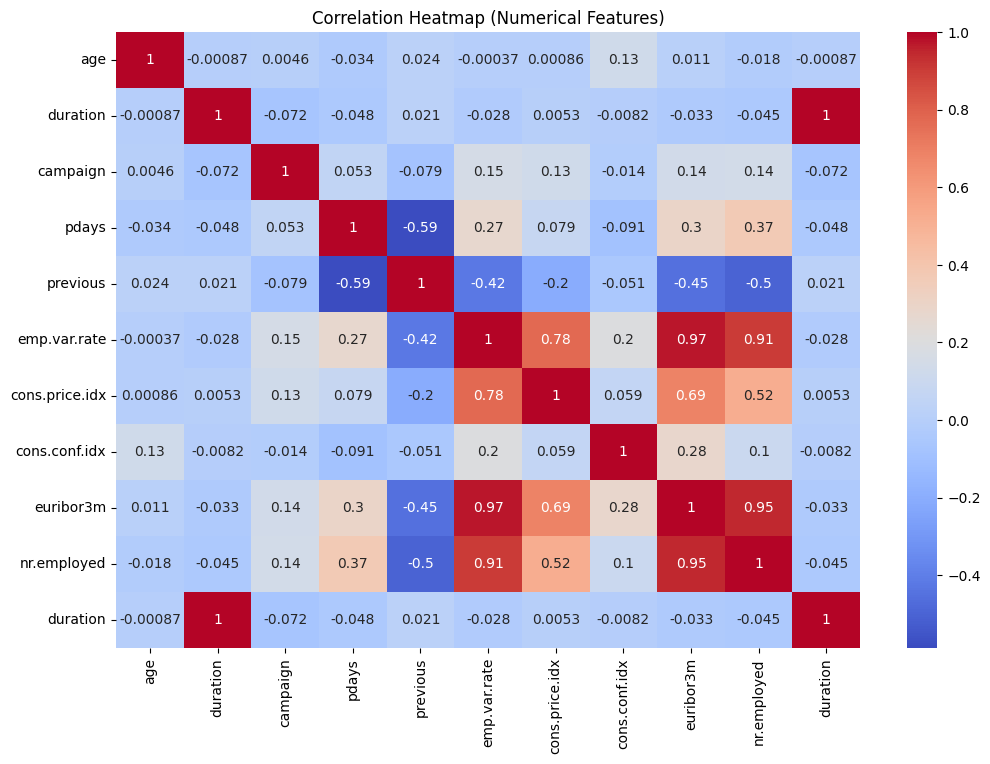


Strong correlations may indicate redundancy or important influence on target (e.g., 'euribor3m', 'emp.var.rate').


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation heatmap (numerical features only)
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical + ['duration']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# understanding
print("\nStrong correlations may indicate redundancy or important influence on target (e.g., 'euribor3m', 'emp.var.rate').")

2. IMBALANCED DATASET


Class distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


<ipython-input-33-293fae80c66d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


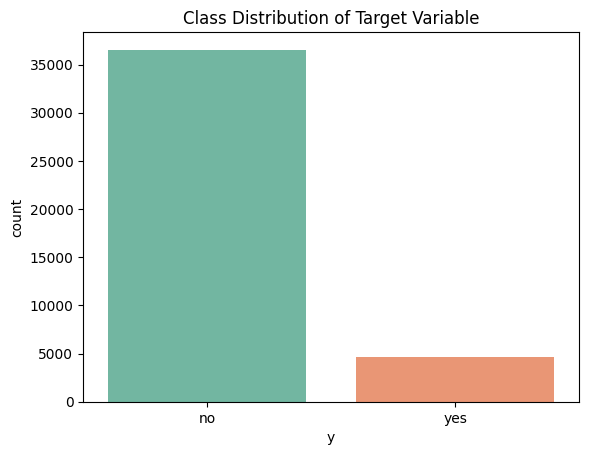

In [ ]:

print("\nClass distribution:")
print(df['y'].value_counts())

sns.countplot(x='y', data=df, palette='Set2')
plt.title('Class Distribution of Target Variable')
plt.show()

DATASET PREPROCESSING

In [ ]:
df = pd.read_csv('/content/sample_data/Bank Marketing.csv')

**3.FAULTS**

We replaced 'unknown' with np.nan and applied imputation

In [ ]:

df.replace('unknown', np.nan, inplace=True)

In [ ]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, precision_score, recall_score)

for categorical features - filled with mod

for numerical features -  filled with median




In [ ]:

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

<ipython-input-38-cfaaac2f6ccd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-38-cfaaac2f6ccd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

Applied Normalization only to numeric features after encoding the dataset.

In [ ]:
# Normalize numeric features
from sklearn.preprocessing import StandardScaler

num_cols = df_encoded.drop('y_yes', axis=1).select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


**DATASET SPLITTING**

In [ ]:

#split to maintain class balance
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

MODEL TRAINING AND TESTING

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN":  KNeighborsClassifier(n_neighbors=5)
}

accuracies = {}
precisions = {}
recalls = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    accuracies[name] = acc
    precisions[name] = prec
    recalls[name] = rec

    print(f"\n{name}")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))






Logistic Regression
Accuracy: 0.9122
Precision: 0.6775
Recall: 0.421
Confusion Matrix:
 [[10686   279]
 [  806   586]]
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.97      0.95     10965
        True       0.68      0.42      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357


KNN
Accuracy: 0.9034
Precision: 0.6002
Recall: 0.426
Confusion Matrix:
 [[10570   395]
 [  799   593]]
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.96      0.95     10965
        True       0.60      0.43      0.50      1392

    accuracy                           0.90     12357
   macro avg       0.76      0.69      0.72     12357
weighted avg       0.89      0.90      0.90     12357



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, roc_curve

**NEURAL NETWORK**

In [ ]:

nn_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train
nn_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0, validation_split=0.1)

# Predict
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32").flatten()

# Metrics
acc_nn = accuracy_score(y_test, y_pred_nn)
prec_nn = precision_score(y_test, y_pred_nn)
rec_nn = recall_score(y_test, y_pred_nn)
conf_nn = confusion_matrix(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, nn_model.predict(X_test))

# Add to results
models["Neural Network"] = nn_model
accuracies["Neural Network"] = acc_nn
precisions["Neural Network"] = prec_nn
recalls["Neural Network"] = rec_nn

# Print report
print("\nNeural Network")
print("Accuracy:", round(acc_nn, 4))
print("Precision:", round(prec_nn, 4))
print("Recall:", round(rec_nn, 4))
print("Confusion Matrix:\n", conf_nn)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Neural Network
Accuracy: 0.91
Precision: 0.622
Recall: 0.5129
Confusion Matrix:
 [[10531   434]
 [  678   714]]


**MODEL SELECTION ANALYSIS**

<ipython-input-46-64e3f3535a2b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='pastel')


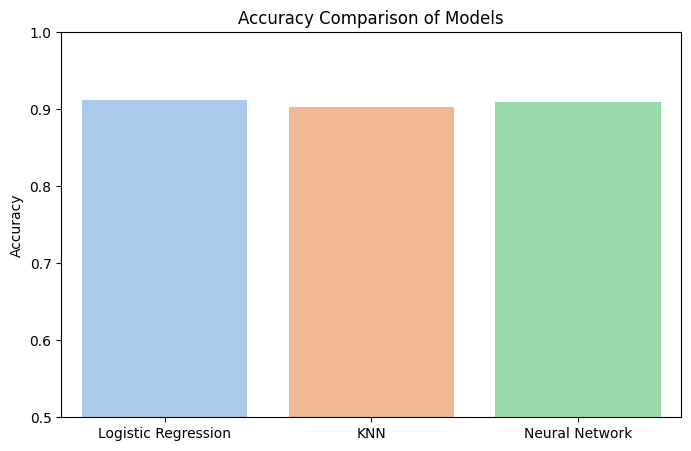

In [ ]:
# Accuracy comparison bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='pastel')
plt.title('Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.show()

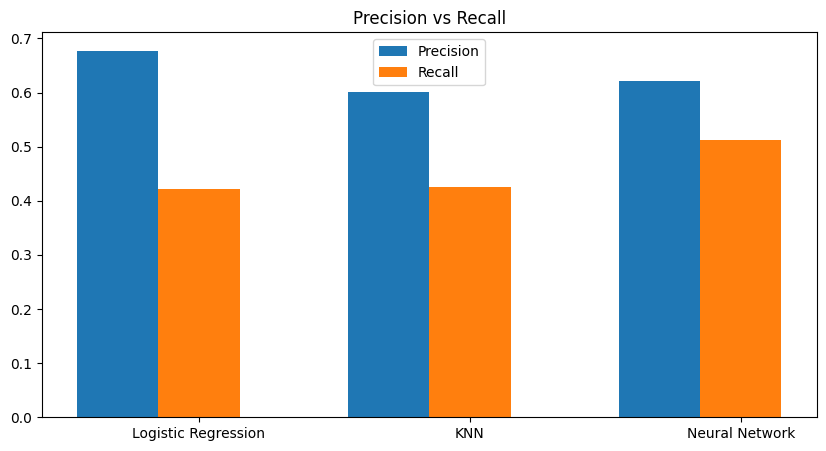

In [ ]:
# Precision and Recall Comparison
plt.figure(figsize=(10, 5))
x = np.arange(len(models))
width = 0.3
plt.bar(x - width, list(precisions.values()), width=width, label='Precision')
plt.bar(x, list(recalls.values()), width=width, label='Recall')
plt.xticks(x, models.keys())
plt.title("Precision vs Recall")
plt.legend()
plt.show()

ROC Curve and AUC score

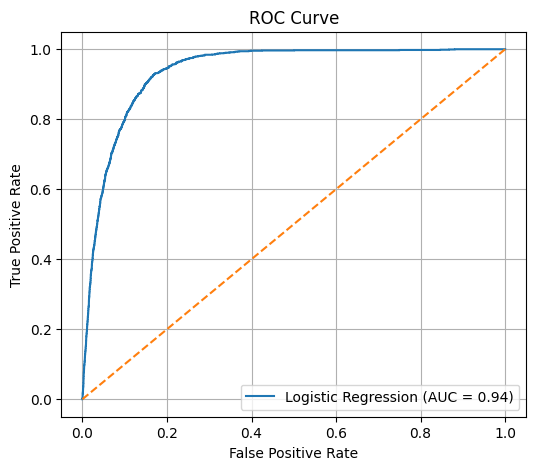

In [ ]:
# (for best model)
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()